# PIXELATED IMAGE DETECTION MODEL TESTING

## UPGRADING TO LATEST LIBRARIES

For our model to work, we need to upgrade this libraries

In [ ]:
%pip install --upgrade pip
%pip install --upgrade tensorflow
%pip install --upgrade scikit-learn
%pip install --upgrade pydot
%pip install --upgrade matplotlib

# # IN CASE YOU ARE FACING ISSUES WHILE LOADING OR IMPORTING LIBRARIES YOU CAN
# # USE THE VERSIONS OF THESE LIBRARIES ON WHICH OUR MODEL WAS INITIALLY TRAINED

# %pip install --upgrade pip==24.1.1
# %pip install --upgrade ipykernel==5.5.6
# %pip install --upgrade numpy==1.25.2
# %pip install --upgrade pandas==2.0.3
# %pip install --upgrade tensorflow==2.16.2
# %pip install --upgrade keras==3.4.1
# %pip install --upgrade scikit-learn==1.5.0
# %pip install --upgrade matplotlib==3.9.0
# %pip install --upgrade pydot==2.0.0

## LOADING THE MODEL

In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow.keras as tfk
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
detector = tfk.models.load_model('./detector_005_1_50.keras')

## LOADING THE DATASET TO FEED TO MODEL

In [ ]:
BATCH_SIZE = 1      # use  1 if all the test images don't have same size
                    # use >1 if all the test images are of same size


NON_PIXELATED = 0
PIXELATED = 1
class_names = ['Non-Pixelated', 'Pixelated']

### TODO: IMAGE PATHS (IMPORTANT)

For pixelated image detction model testing we require two lists:
- `image_paths` : this contains all the image paths eg. ['./path/to/image1.jpg', './path/to/image2.png', ...]
- `image_labels`: this containts the labels eg. [1, 0, 0, ...]

So please implement the following cell according to how your dataset is organized

In [ ]:
# image_dir = './un_mod_ultimate/'
# image_basenames = sorted(os.listdir(image_dir))

# image_paths = [os.path.join(image_dir, bname) for bname in image_basenames]
# image_labels = [NON_PIXELATED if bname.split('_')[1][0] == 'r' else PIXELATED for bname in image_basenames]

In [ ]:
# check if your implementation working correctly

print(len(image_paths))
print(len(image_labels))

print(image_paths[-10:])
print(image_labels[-10:])

1028
1028
['./un_mod_ultimate/800001019_d3.png', './un_mod_ultimate/800001020_d8.png', './un_mod_ultimate/800001021_d2.png', './un_mod_ultimate/800001022_real.png', './un_mod_ultimate/800001023_real.png', './un_mod_ultimate/800001024_d6.png', './un_mod_ultimate/800001025_d3.png', './un_mod_ultimate/800001026_j10.png', './un_mod_ultimate/800001027_d6.png', './un_mod_ultimate/800001028_d2.png']
[1, 1, 1, 0, 0, 1, 1, 1, 1, 1]


### DATASET OBJECT CREATION

this function loads the image from corresponding image_path and preprocesses it to have:
- pixel values in [0,1], float32 type, 3 channels
- pad to have height, width as multiple of 64 (this is required due to model architecture)

In [ ]:
@tf.function
def load_process_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False, dtype=tf.float32)

    shape = tf.shape(img)
    height, width = shape[0], shape[1]
    padding_width  = ((width  + 63) // 64) * 64 - width
    padding_height = ((height + 63) // 64) * 64 - height
    left  = padding_width  // 2
    upper = padding_height // 2

    return tf.image.pad_to_bounding_box(img, upper, left, height + padding_height, width + padding_width)

# create the dataset, batch, prefetch object

custom_test_dataset = tf.data.Dataset.from_tensor_slices(image_paths).map(load_process_image, num_parallel_calls=tf.data.AUTOTUNE, deterministic=True)\
                                                                     .batch(batch_size=BATCH_SIZE, num_parallel_calls=tf.data.AUTOTUNE, deterministic=True)\
                                                                     .prefetch(buffer_size=tf.data.AUTOTUNE)

## MODEL EVALUATION

In [ ]:
predictions = detector.predict(custom_test_dataset)
pred_labels = tf.where(predictions < 0, NON_PIXELATED, PIXELATED).numpy().flatten()
true_labels = np.array(image_labels)

257/257 ━━━━━━━━━━━━━━━━━━━━ 114s 374ms/step



Accuracy: 0.8716

Class Names    Precision  Recall  F1-Score
--------------------------------------------
Non-Pixelated    0.8096   0.8781   0.8425
Pixelated        0.9172   0.8674   0.8916


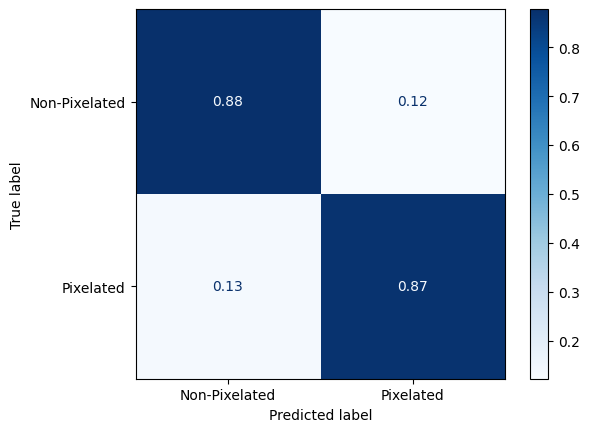

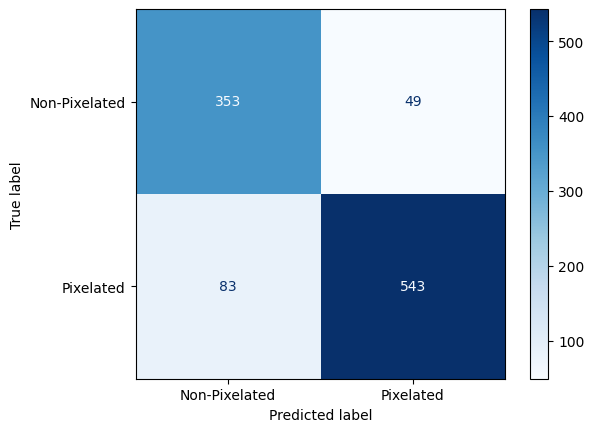

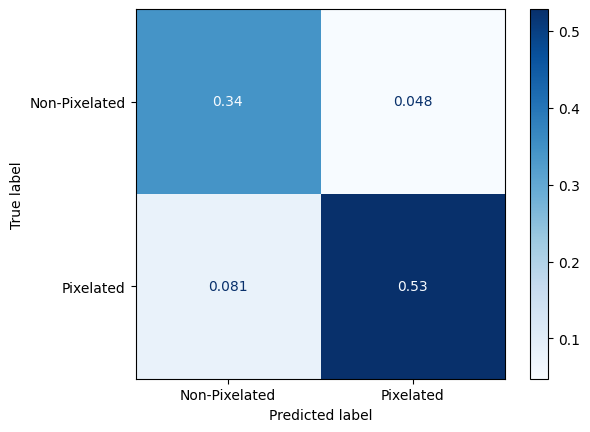

In [ ]:
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average=None, zero_division=0.0)
recall = recall_score(true_labels, pred_labels, average=None, zero_division=0.0)
f1 = f1_score(true_labels, pred_labels, average=None)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nClass Names    Precision  Recall  F1-Score")
print("--------------------------------------------")
for class_name, p, r, f in zip(class_names, precision, recall, f1):
  print(f"{class_name:15}  {p:.4f}   {r:.4f}   {f:.4f}")

_ = ConfusionMatrixDisplay.from_predictions(true_labels, pred_labels, display_labels=class_names, normalize='true', cmap='Blues')
_ = ConfusionMatrixDisplay.from_predictions(true_labels, pred_labels, display_labels=class_names, normalize= None,  cmap='Blues')
_ = ConfusionMatrixDisplay.from_predictions(true_labels, pred_labels, display_labels=class_names, normalize='all',  cmap='Blues')